In [1]:
import pickle
import csv
import math
import pandas as pd
import numpy as np
import os

In [2]:
from rdkit import DataStructs
from rdkit import Chem
from rdkit.Chem import AllChem

RDKit WARNING: [12:59:03] Enabling RDKit 2019.09.3 jupyter extensions


In [3]:
from sklearn.preprocessing import KernelCenterer

In [4]:
from process_dataset.process_DB import get_DB

# Benoit's data

In [5]:
benoit_dir = "/Users/matthieu/ownCloud/CFTR_PhD/Chemogenomics/Benoit/passage_de_relai/CFTR_PROJECT/data/NNdti_S0h/"

In [6]:
old_dict_ligand = pickle.load(open(benoit_dir + 
'NNdti_S0h_dict_DBid2smiles.data', 'rb'))
old_dict_target = pickle.load(open(benoit_dir + 
'NNdti_S0h_dict_uniprot2fasta.data', 'rb'))

old_intMat = np.load(benoit_dir + 'NNdti_S0h_intMat.npy')
    
old_dict_ind2mol = pickle.load(open(benoit_dir + 
'NNdti_S0h_dict_ind2mol.data', 'rb'))
old_dict_mol2ind = pickle.load(open(benoit_dir + 
'NNdti_S0h_dict_mol2ind.data', 'rb'))
old_dict_prot2ind = pickle.load(open(benoit_dir + 
'NNdti_S0h_dict_prot2ind.data', 'rb'))
old_dict_ind2prot = pickle.load(open(benoit_dir + 
'NNdti_S0h_dict_ind2prot.data', 'rb'))

In [7]:
old_K_mol_norm = pickle.load(open(benoit_dir + 'NNDti_S0h_Kmol_norm.data', 'rb'))
old_K_mol = pickle.load(open(benoit_dir + 'NNDti_S0h_Kmol.data', 'rb'))
# old_K_prot = pickle.load(open(benoit_dir + 'NNDti_S0h_Kprot_norm.data', 'rb'))

# Matthieu's data

In [8]:
os.getcwd()

'/Users/matthieu/ownCloud/Programming/DTI_prediction'

In [9]:
root = '../CFTR_PROJECT/'

In [10]:
DB_version = "drugbank_v5.1.1"
DB_type = "S0h"
process_name = "Benoit_NNdti"

In [11]:
# data_dir variable 
data_dir = 'data/' + DB_version + '/' + process_name + '_' + DB_type + '/'
# pattern_name variable
pattern_name = process_name + '_' + DB_type

In [12]:
raw_data_dir = 'data/' + DB_version + '/raw/'

In [13]:
dict_ligand = pickle.load(open(root + data_dir + pattern_name + '_dict_DBid2smiles.data', 'rb'))
dict_target = pickle.load(open(root + data_dir + pattern_name + '_dict_uniprot2fasta.data', 'rb'))

list_interactions = pickle.load(open(root + data_dir + pattern_name + '_list_interactions.data', 'rb'))
intMat = np.load(root + data_dir + pattern_name + '_intMat.npy')
    
dict_ind2mol = pickle.load(open(root + data_dir + pattern_name + '_dict_ind2mol.data', 'rb'))
dict_mol2ind = pickle.load(open(root + data_dir + pattern_name + '_dict_mol2ind.data', 'rb'))
dict_prot2ind = pickle.load(open(root + data_dir + pattern_name + '_dict_prot2ind.data', 'rb'))
dict_ind2prot = pickle.load(open(root + data_dir + pattern_name + '_dict_ind2prot.data', 'rb'))

In [14]:
K_mol_norm = pickle.load(open(root + data_dir + pattern_name + '_Kmol_norm.data', 'rb'))
K_mol = pickle.load(open(root + data_dir + pattern_name + '_Kmol.data', 'rb'))
# K_prot = pickle.load(open(benoit_dir + '_Kprot_norm.data', 'rb'))

In [21]:
dict_ind2prot

{0: 'P04035',
 1: 'P05160',
 2: 'O00750',
 3: 'P29317',
 4: 'O14649',
 5: 'P52597',
 6: 'P27487',
 7: 'Q16322',
 8: 'A1L3X4',
 9: 'O60909',
 10: 'O00763',
 11: 'O76074',
 12: 'Q13183',
 13: 'P17516',
 14: 'Q9NY47',
 15: 'P28566',
 16: 'P28062',
 17: 'P01764',
 18: 'P11086',
 19: 'Q9BZW2',
 20: 'P49821',
 21: 'P02708',
 22: 'P20472',
 23: 'Q8WX39',
 24: 'Q08170',
 25: 'O00764',
 26: 'O14791',
 27: 'Q96PR1',
 28: 'O15403',
 29: 'O95363',
 30: 'P18465',
 31: 'Q08257',
 32: 'O60882',
 33: 'Q06278',
 34: 'O43272',
 35: 'P07814',
 36: 'P45954',
 37: 'O15146',
 38: 'Q9UL51',
 39: 'Q15596',
 40: 'P62166',
 41: 'P43080',
 42: 'P37059',
 43: 'O15399',
 44: 'P08581',
 45: 'P22234',
 46: 'Q16566',
 47: 'P02655',
 48: 'Q9BQE3',
 49: 'P19404',
 50: 'P06731',
 51: 'O14732',
 52: 'O43674',
 53: 'Q9UEW3',
 54: 'P00740',
 55: 'P10109',
 56: 'P09038',
 57: 'P19827',
 58: 'P99999',
 59: 'Q9Y5Y6',
 60: 'P51553',
 61: 'O00299',
 62: 'O95747',
 63: 'Q07075',
 64: 'Q9Y600',
 65: 'P10412',
 66: 'P08559',
 67: 

# Comparaison

## Dictionaries

In [15]:
def compare_two_dictionaries(x, y):
    shared_items = {k: x[k] for k in x if k in y and x[k] == y[k]}
    print(len(shared_items))

In [16]:
def diff_items_two_dictionaries(x, y):
    diff_items = {k: x[k] for k in x if k in y and x[k] != y[k]}
    print(diff_items)

In [17]:
compare_two_dictionaries(old_dict_ligand, dict_ligand)
diff_items_two_dictionaries(old_dict_ligand, dict_ligand)

4837
{}


## Numpy arrays

In [18]:
np.array_equal(old_intMat, intMat)

True

In [19]:
K_mol_norm

array([[ 1.00000000e+00,  6.37756110e-02,  5.83236125e-03, ...,
        -1.91698631e-02,  7.68078638e-02, -2.26275410e-02],
       [ 6.37756110e-02,  1.00000000e+00,  3.57789510e-02, ...,
        -2.42862454e-02,  2.94353454e-02,  4.75407978e-02],
       [ 5.83236125e-03,  3.57789510e-02,  1.00000000e+00, ...,
        -2.85592981e-02,  1.45660810e-02,  2.09336769e-02],
       ...,
       [-1.91698631e-02, -2.42862454e-02, -2.85592981e-02, ...,
         1.00000000e+00,  6.54242360e-04, -5.92035351e-03],
       [ 7.68078638e-02,  2.94353454e-02,  1.45660810e-02, ...,
         6.54242360e-04,  1.00000000e+00, -1.34973351e-02],
       [-2.26275410e-02,  4.75407978e-02,  2.09336769e-02, ...,
        -5.92035351e-03, -1.34973351e-02,  1.00000000e+00]])

In [20]:
old_K_mol_norm

array([[ 1.00000000e+00,  6.37760228e-02,  5.83255946e-03, ...,
        -1.91681589e-02,  7.68033334e-02, -2.26275203e-02],
       [ 6.37760228e-02,  1.00000000e+00,  3.57777161e-02, ...,
        -2.42858523e-02,  2.94291713e-02,  4.75394404e-02],
       [ 5.83255946e-03,  3.57777161e-02,  1.00000000e+00, ...,
        -2.85591231e-02,  1.45595511e-02,  2.09320417e-02],
       ...,
       [-1.91681589e-02, -2.42858523e-02, -2.85591231e-02, ...,
         1.00000000e+00,  6.49925532e-04, -5.92033711e-03],
       [ 7.68033334e-02,  2.94291713e-02,  1.45595511e-02, ...,
         6.49925532e-04,  1.00000000e+00, -1.35040547e-02],
       [-2.26275203e-02,  4.75394404e-02,  2.09320417e-02, ...,
        -5.92033711e-03, -1.35040547e-02,  1.00000000e+00]])

In [92]:
diff_K_mol_norm = (K_mol_norm - old_K_mol_norm)/old_K_mol_norm

In [93]:
diff_K_mol_norm

array([[ 0.00000000e+00, -6.45736030e-06, -3.39829746e-05, ...,
         8.89074339e-05,  5.89869963e-05,  9.16559942e-07],
       [-6.45736030e-06,  0.00000000e+00,  3.45177345e-05, ...,
         1.61859084e-05,  2.09795862e-04,  2.85524968e-05],
       [-3.39829746e-05,  3.45177345e-05,  0.00000000e+00, ...,
         6.12967644e-06,  4.48495998e-04,  7.81196625e-05],
       ...,
       [ 8.89074339e-05,  1.61859084e-05,  6.12967644e-06, ...,
         0.00000000e+00,  6.64203463e-03,  2.77101958e-06],
       [ 5.89869963e-05,  2.09795862e-04,  4.48495998e-04, ...,
         6.64203463e-03,  0.00000000e+00, -4.97601685e-04],
       [ 9.16559942e-07,  2.85524968e-05,  7.81196625e-05, ...,
         2.77101958e-06, -4.97601685e-04,  0.00000000e+00]])

In [90]:
import matplotlib.pyplot as plt

(array([[   0.,    0.,    0., ..., 4837.,    0.,    0.],
        [   0.,    0.,    0., ..., 4837.,    0.,    0.],
        [   0.,    0.,    0., ..., 4837.,    0.,    0.],
        ...,
        [   0.,    0.,    0., ..., 4837.,    0.,    0.],
        [   0.,    0.,    0., ..., 4837.,    0.,    0.],
        [   0.,    0.,    0., ..., 4837.,    0.,    0.]]),
 array([-0.1895532 , -0.1652421 , -0.140931  , -0.1166199 , -0.0923088 ,
        -0.06799769, -0.04368659, -0.01937549,  0.00493561,  0.02924672,
         0.05355782]),
 <a list of 4837 Lists of Patches objects>)

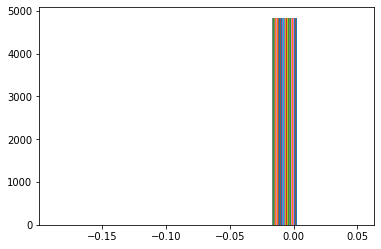

In [91]:
plt.hist(diff_K_mol_norm)

In [96]:
np.sum(diff_K_mol_norm >= 0.5)

2630

In [65]:
np.sum(K_mol_norm >= 0.03)

5159403

In [56]:
5114254 - (1057 * 4837)

1545

In [58]:
diff_K_mol_norm[1057, 1545]

0.053557818168606

In [67]:
a = 'mkdir nwdir'

b = os.popen(a, 'r', 1)

In [68]:
print(b)